## Table of Content

* [Introduction](##Introduction)
* [Loading and Cleaning the Data](##Loading_and_Cleaning_the_Data)
* [Exploratory Data Analysis](##Exploratory_Data_Analysis)
* [Modeling](##Modeling)

## Introduction

#### Objective
The primary objective of this project is to develop a predictive model using logistic regression to determine the 10-year risk of coronary heart disease (CHD) in patients. The dataset used for this analysis is publicly available on Kaggle and originates from an ongoing cardiovascular study on residents of Framingham, Massachusetts.

Dataset source: [Kaggle: Cardiovascular Study Dataset](https://www.kaggle.com/datasets/christofel04/cardiovascular-study-dataset-predict-heart-disea)

#### Dataset Description
The dataset includes 3,390 records and 15 attributes, which are categorized into demographic, behavioral, and medical risk factors. The target variable is the 10-year risk of CHD, which is binary (1 for "Yes", 0 for "No").

#### Steps to be Followed
1. Load the data and clean it. Address the most critical issues with missing data.
2. Perform exploratory data analysis. Plot single variables and correlations between the target variable and the dependent variables. Note anything interesting.
3. Split your dataset into training and testing datasets.
4. Address missing data and outliers appropriately.
5. Select variables that should be included in the regression model. Explain your reasoning.
6. Choose the most appropriate classification metric for this problem and calculate the optimal t-hreshold. Provide arguments to support your decision.
7. Report key model accuracy metrics and provide their interpretation.
8. Report which variables have the most predictive power in your model. Provide a clear interpretation of model coefficients.

#### Variables

Each attribute is a potential risk factor. There are both demographic, behavioural and medical risk factors.

**Demographic:**
- Sex: male or female("M" or "F")
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**
- is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical (history)**
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
- Diabetes: whether or not the patient had diabetes (Nominal)

**Medical (current)**
- Tot Chol: total cholesterol level (Continuous)
- Sys BP: systolic blood pressure (Continuous)
- Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level (Continuous)

**Predict variable (desired target)**
- 10 year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)

## Loading_and_Cleaning_the_Data

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("train.csv", index_col=0)
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [23]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


The dataset consists of 3,390 entries with various data types, including integers, floats, and objects (categorical data).<br>
The dataset contains 16 columns, including demographic, behavioural, and medical risk factors and the target variable TenYearCHD.<br>
Understanding the data types is crucial for preprocessing steps such as encoding categorical variables and scaling numerical features.

#### Descriptive Statistics
The describe() method is used to generate descriptive statistics for the dataset, giving insights into the distribution of each feature.

In [25]:
df.describe().round(2)

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.00,3303.00,3368.00,3346.00,3390.00,3390.00,3390.00,3352.00,3390.00,3390.00,3376.00,3389.00,3086.00,3390.00
mean,49.54,1.97,9.07,0.03,0.01,0.32,0.03,237.07,132.60,82.88,25.79,75.98,82.09,0.15
std,8.59,1.02,11.88,0.17,0.08,0.46,0.16,45.25,22.29,12.02,4.12,11.97,24.24,0.36
min,32.00,1.00,0.00,0.00,0.00,0.00,0.00,107.00,83.50,48.00,15.96,45.00,40.00,0.00
25%,42.00,1.00,0.00,0.00,0.00,0.00,0.00,206.00,117.00,74.50,23.02,68.00,71.00,0.00
50%,49.00,2.00,0.00,0.00,0.00,0.00,0.00,234.00,128.50,82.00,25.38,75.00,78.00,0.00
75%,56.00,3.00,20.00,0.00,0.00,1.00,0.00,264.00,144.00,90.00,28.04,83.00,87.00,0.00
max,70.00,4.00,70.00,1.00,1.00,1.00,1.00,696.00,295.00,142.50,56.80,143.00,394.00,1.00


In [26]:
df.describe(include=['object'])

,sex,is_smoking
count,3390,3390
unique,2,2
top,F,NO
freq,1923,1703


Features with high variance or skewness may require transformation or normalization to improve model performance.

In [27]:
df[df.duplicated()]

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,


#### Missing Values
The number of missing values in each column is calculated and sorted in descending order to identify columns with the most missing data.

In [28]:
df.isnull().sum().sort_values(ascending=False)

glucose            304
education           87
BPMeds              44
totChol             38
cigsPerDay          22
BMI                 14
heartRate            1
age                  0
sex                  0
is_smoking           0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
dtype: int64

In [29]:
(df.isnull().mean().sort_values(ascending=False) * 100).round(2)

glucose            8.97
education          2.57
BPMeds             1.30
totChol            1.12
cigsPerDay         0.65
BMI                0.41
heartRate          0.03
age                0.00
sex                0.00
is_smoking         0.00
prevalentStroke    0.00
prevalentHyp       0.00
diabetes           0.00
sysBP              0.00
diaBP              0.00
TenYearCHD         0.00
dtype: float64

Several columns have missing values, with the glucose column having the highest percentage of missing data (8.97%).<br>
Other columns with notable missing values include education (2.57%), BPMeds (1.30%), totChol (1.12%), and cigsPerDay (0.65%).<br>
Missing data needs to be addressed through imputation or removal to prevent biases and inaccuracies in the model. Columns with a high percentage of missing values, like glucose, require special attention.

#### Anomaly Detection
Checking if systolic blood pressure (sysBP) is not greater than diastolic blood pressure (diaBP) as anomalies.

In [30]:
sysBP_anomalies = df[df["sysBP"] <= df["diaBP"]]
print(f"Number of anomalies (sysBP <= diaBP): {len(sysBP_anomalies)}")

Number of anomalies (sysBP <= diaBP): 0


Anomalies can distort model training and predictions. These rows should be corrected or removed to ensure the model learns from accurate data.

#### Inconsistent Data
Checking if patients are marked as smokers (is_smoking == 1) but have cigsPerDay as 0 as inconsistent data.

In [31]:
inconsistent_smokers = df[(df["is_smoking"] == 1) & (df["cigsPerDay"] == 0)]
print(f"Number of smokers with 0 cigarettes per day: {len(inconsistent_smokers)}")

Number of smokers with 0 cigarettes per day: 0


In [32]:
df.groupby(["cigsPerDay"])["cigsPerDay"].count()

cigsPerDay
0.0     1703
1.0       48
2.0       17
3.0       79
4.0        7
5.0      103
6.0       14
7.0        8
8.0       10
9.0      104
10.0     106
11.0       4
12.0       3
13.0       3
14.0       1
15.0     172
16.0       2
17.0       5
18.0       7
19.0       2
20.0     606
23.0       5
25.0      44
30.0     176
35.0      17
38.0       1
40.0      62
43.0      42
45.0       2
50.0       6
60.0       8
70.0       1
Name: cigsPerDay, dtype: int64

#### Categorical to Numeric Conversion

In [33]:
# Converting categorical variables to numeric
df["sex"] = df["sex"].map({"F": 0, "M": 1})
df["is_smoking"] = df["is_smoking"].map({"NO": 0, "YES": 1})

Categorical variables sex and is_smoking were converted to numeric values for easier analysis and modeling. Specifically, sex was mapped to 0 (Female) and 1 (Male), and is_smoking was mapped to 0 (No) and 1 (Yes).

#### Summary for Future Modeling Steps
- **Handling Missing Values**: Imputation strategies need to be carefully chosen to handle missing data without introducing bias.
- **Addressing Anomalies and Inconsistencies**: Correcting or removing anomalies and inconsistencies will improve the model's accuracy and reliability.
- **Data Integrity**: Ensuring data integrity through checks for duplicates and consistency will lead to more reliable model outcomes.

## Exploratory_Data_Analysis

#### Target Variable Distribution
The distribution of the target variable TenYearCHD is visualized using a count plot. The value counts and percentages of each class (0 and 1) are also printed to understand the class distribution.

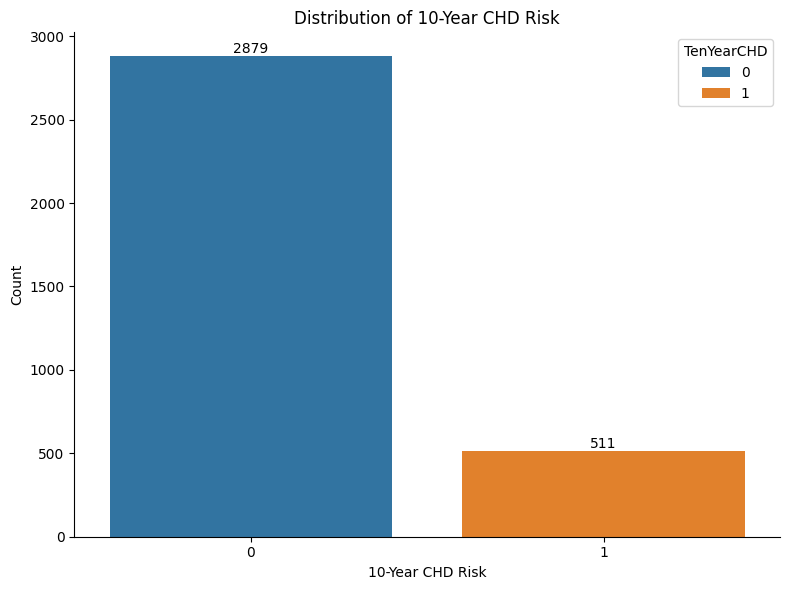

Distribution of 10-Year CHD Risk:
Class 0: 2879 (84.93%)
Class 1: 511 (15.07%)
Ratio of CHD 0 to CHD 1  5.63/1


In [34]:
target = df["TenYearCHD"]

plt.figure(figsize=(8, 6))
ax = sns.countplot(x=target, data=df, hue="TenYearCHD")

plt.title("Distribution of 10-Year CHD Risk")
plt.xlabel("10-Year CHD Risk")
plt.ylabel("Count")
for container in ax.containers:
    ax.bar_label(container)

# Removing the top and right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()

# Printing the value counts and percentages
value_counts = df["TenYearCHD"].value_counts()
percentages = df["TenYearCHD"].value_counts(normalize=True) * 100

# Calculating the ratio of CHD 0 to CHD 1
ratio = value_counts[0] / value_counts[1]
ratio_simplified = f"{ratio:.2f}/1" if ratio >= 1 else f"1/{(1/ratio):.2f}"

print(
    f"Distribution of 10-Year CHD Risk:\n"
    f"Class 0: {value_counts[0]} ({percentages[0]:.2f}%)\n"
    f"Class 1: {value_counts[1]} ({percentages[1]:.2f}%)\n"
    f"Ratio of CHD 0 to CHD 1  {ratio_simplified}"
)

The target variable TenYearCHD shows class imbalance, with a higher number of patients not having CHD (Class 0) compared to those who do (Class 1).<br>
Class imbalance can affect model performance, particularly in terms of recall and precision for the minority class. Techniques such as class weighting, oversampling, or undersampling may be necessary.

#### Continuous Variables Distribution
Histograms are plotted for each continuous variable, with the data split by the target variable TenYearCHD. This helps in understanding the distribution of each continuous variable and its relationship with the target variable.

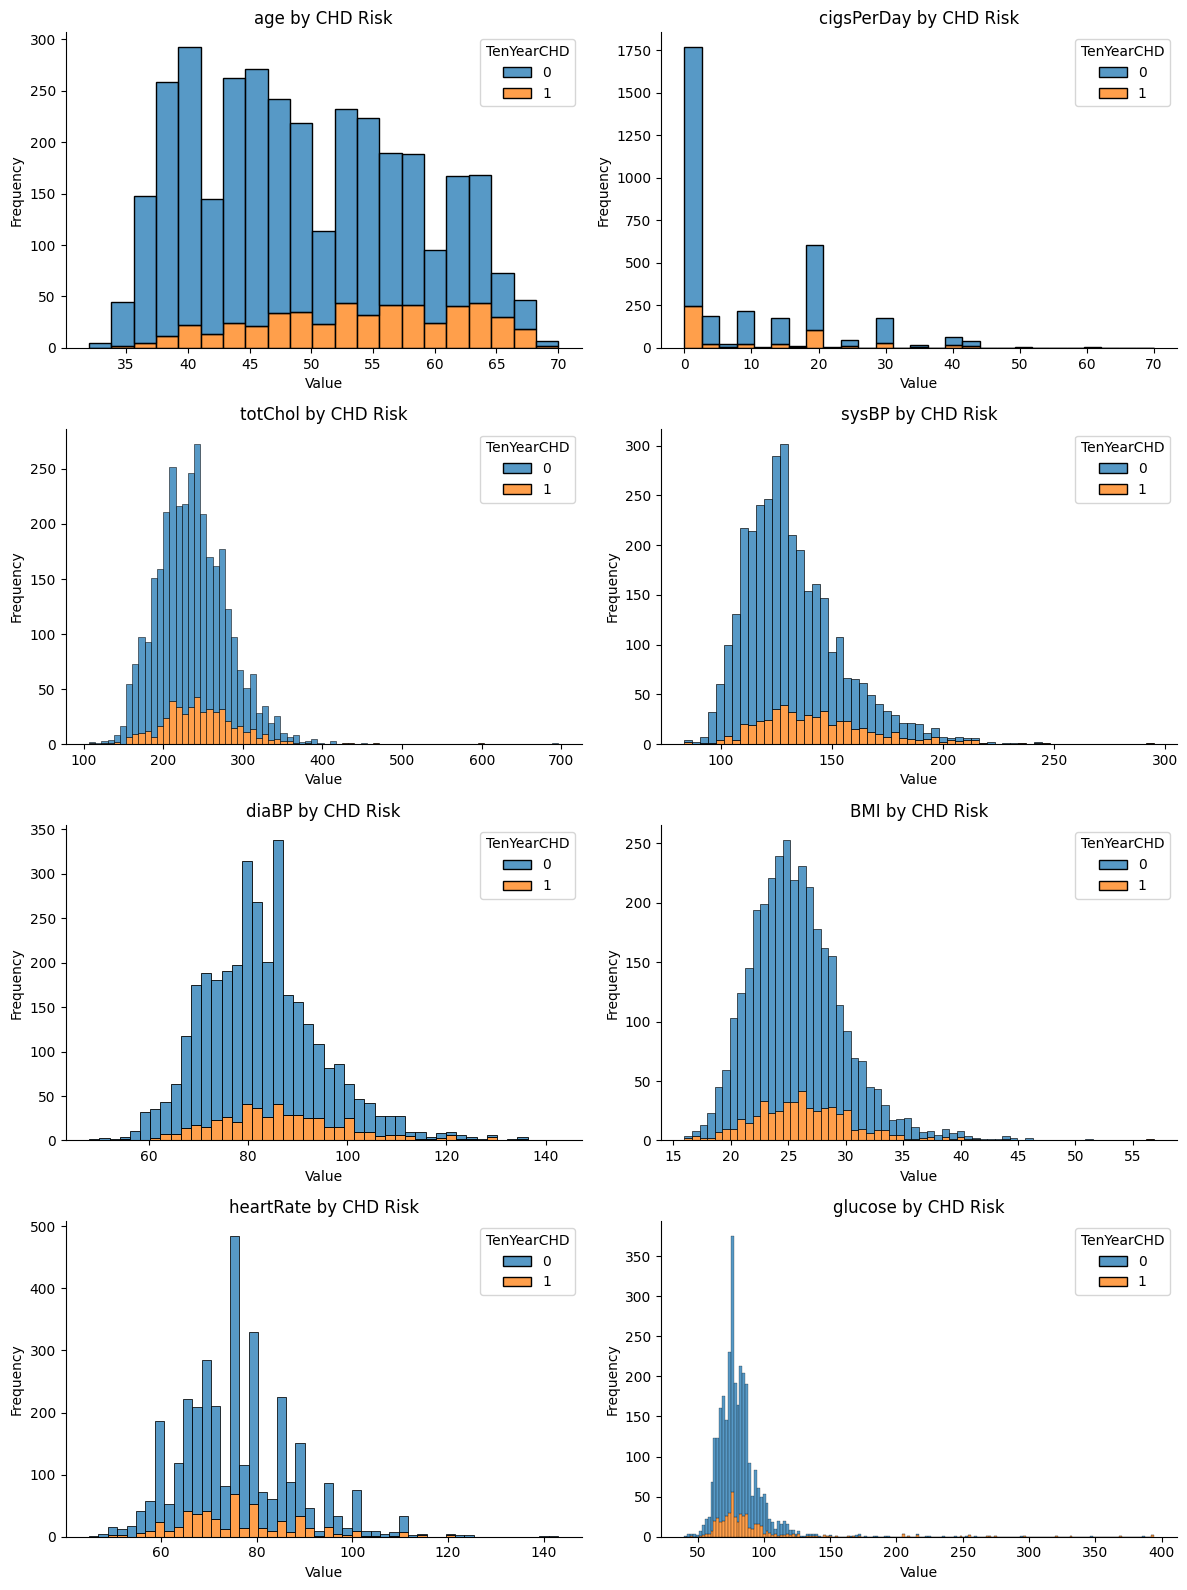

In [35]:
continuous_cols = [
    "age", "cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"
]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))
axes = axes.flatten()

for i, col in enumerate(continuous_cols):
    data = df[col].dropna()

    IQR = np.percentile(data, 75) - np.percentile(data, 25)

    # Calculating the bin width using the Freedman-Diaconis rule 
    # source: https://nkugwamarkwilliam.medium.com/how-to-determine-bin-width-for-a-histogram-r-and-pyth-653598ab0d1c
    bin_width_fd = 2 * IQR / np.power(len(data), 1/3)
    
    # Calculating number of bins
    data_range = np.max(data) - np.min(data)
    n_bins = int(np.ceil(data_range / bin_width_fd))

    sns.histplot(
        data=df, x=col, hue="TenYearCHD", multiple="stack", 
        bins=n_bins, ax=axes[i]
    )
    axes[i].spines["top"].set_visible(False)
    axes[i].spines["right"].set_visible(False)
    axes[i].set_title(f"{col} by CHD Risk")
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

**Age**: The distribution of age shows that older patients tend to have a higher risk of CHD. Age is likely a strong predictor of CHD risk.<br><br>
**Cigarettes Per Day (cigsPerDay)**: The mean number of cigarettes per day is 9.07, and the median is 0.00. The distribution is highly right-skewed, with a significant number of patients reporting 0 cigarettes per day. The high number of zeros (non-smokers) and the right-skewed distribution suggest that this variable may need special handling.<br><br>
**Total Cholesterol (totChol)**: The distribution of total cholesterol is approximately normal but slightly right-skewed. The mean total cholesterol level is 237.07 mg/dL. Total cholesterol is a significant predictor of CHD risk. Normalisation or standardisation may be beneficial.


In [36]:
df.describe().round(2)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.00,3303.00,3390.00,3390.0,3368.00,3346.00,3390.00,3390.00,3390.00,3352.00,3390.00,3390.00,3376.00,3389.00,3086.00,3390.00
mean,49.54,1.97,0.43,0.5,9.07,0.03,0.01,0.32,0.03,237.07,132.60,82.88,25.79,75.98,82.09,0.15
std,8.59,1.02,0.50,0.5,11.88,0.17,0.08,0.46,0.16,45.25,22.29,12.02,4.12,11.97,24.24,0.36
min,32.00,1.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,107.00,83.50,48.00,15.96,45.00,40.00,0.00
25%,42.00,1.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,206.00,117.00,74.50,23.02,68.00,71.00,0.00
50%,49.00,2.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,234.00,128.50,82.00,25.38,75.00,78.00,0.00
75%,56.00,3.00,1.00,1.0,20.00,0.00,0.00,1.00,0.00,264.00,144.00,90.00,28.04,83.00,87.00,0.00
max,70.00,4.00,1.00,1.0,70.00,1.00,1.00,1.00,1.00,696.00,295.00,142.50,56.80,143.00,394.00,1.00


#### Box Plots for Continuous Variables
Box plots are created for each continuous variable, grouped by the target variable TenYearCHD. This visualization helps in identifying the central tendency, spread, and potential outliers for each variable.

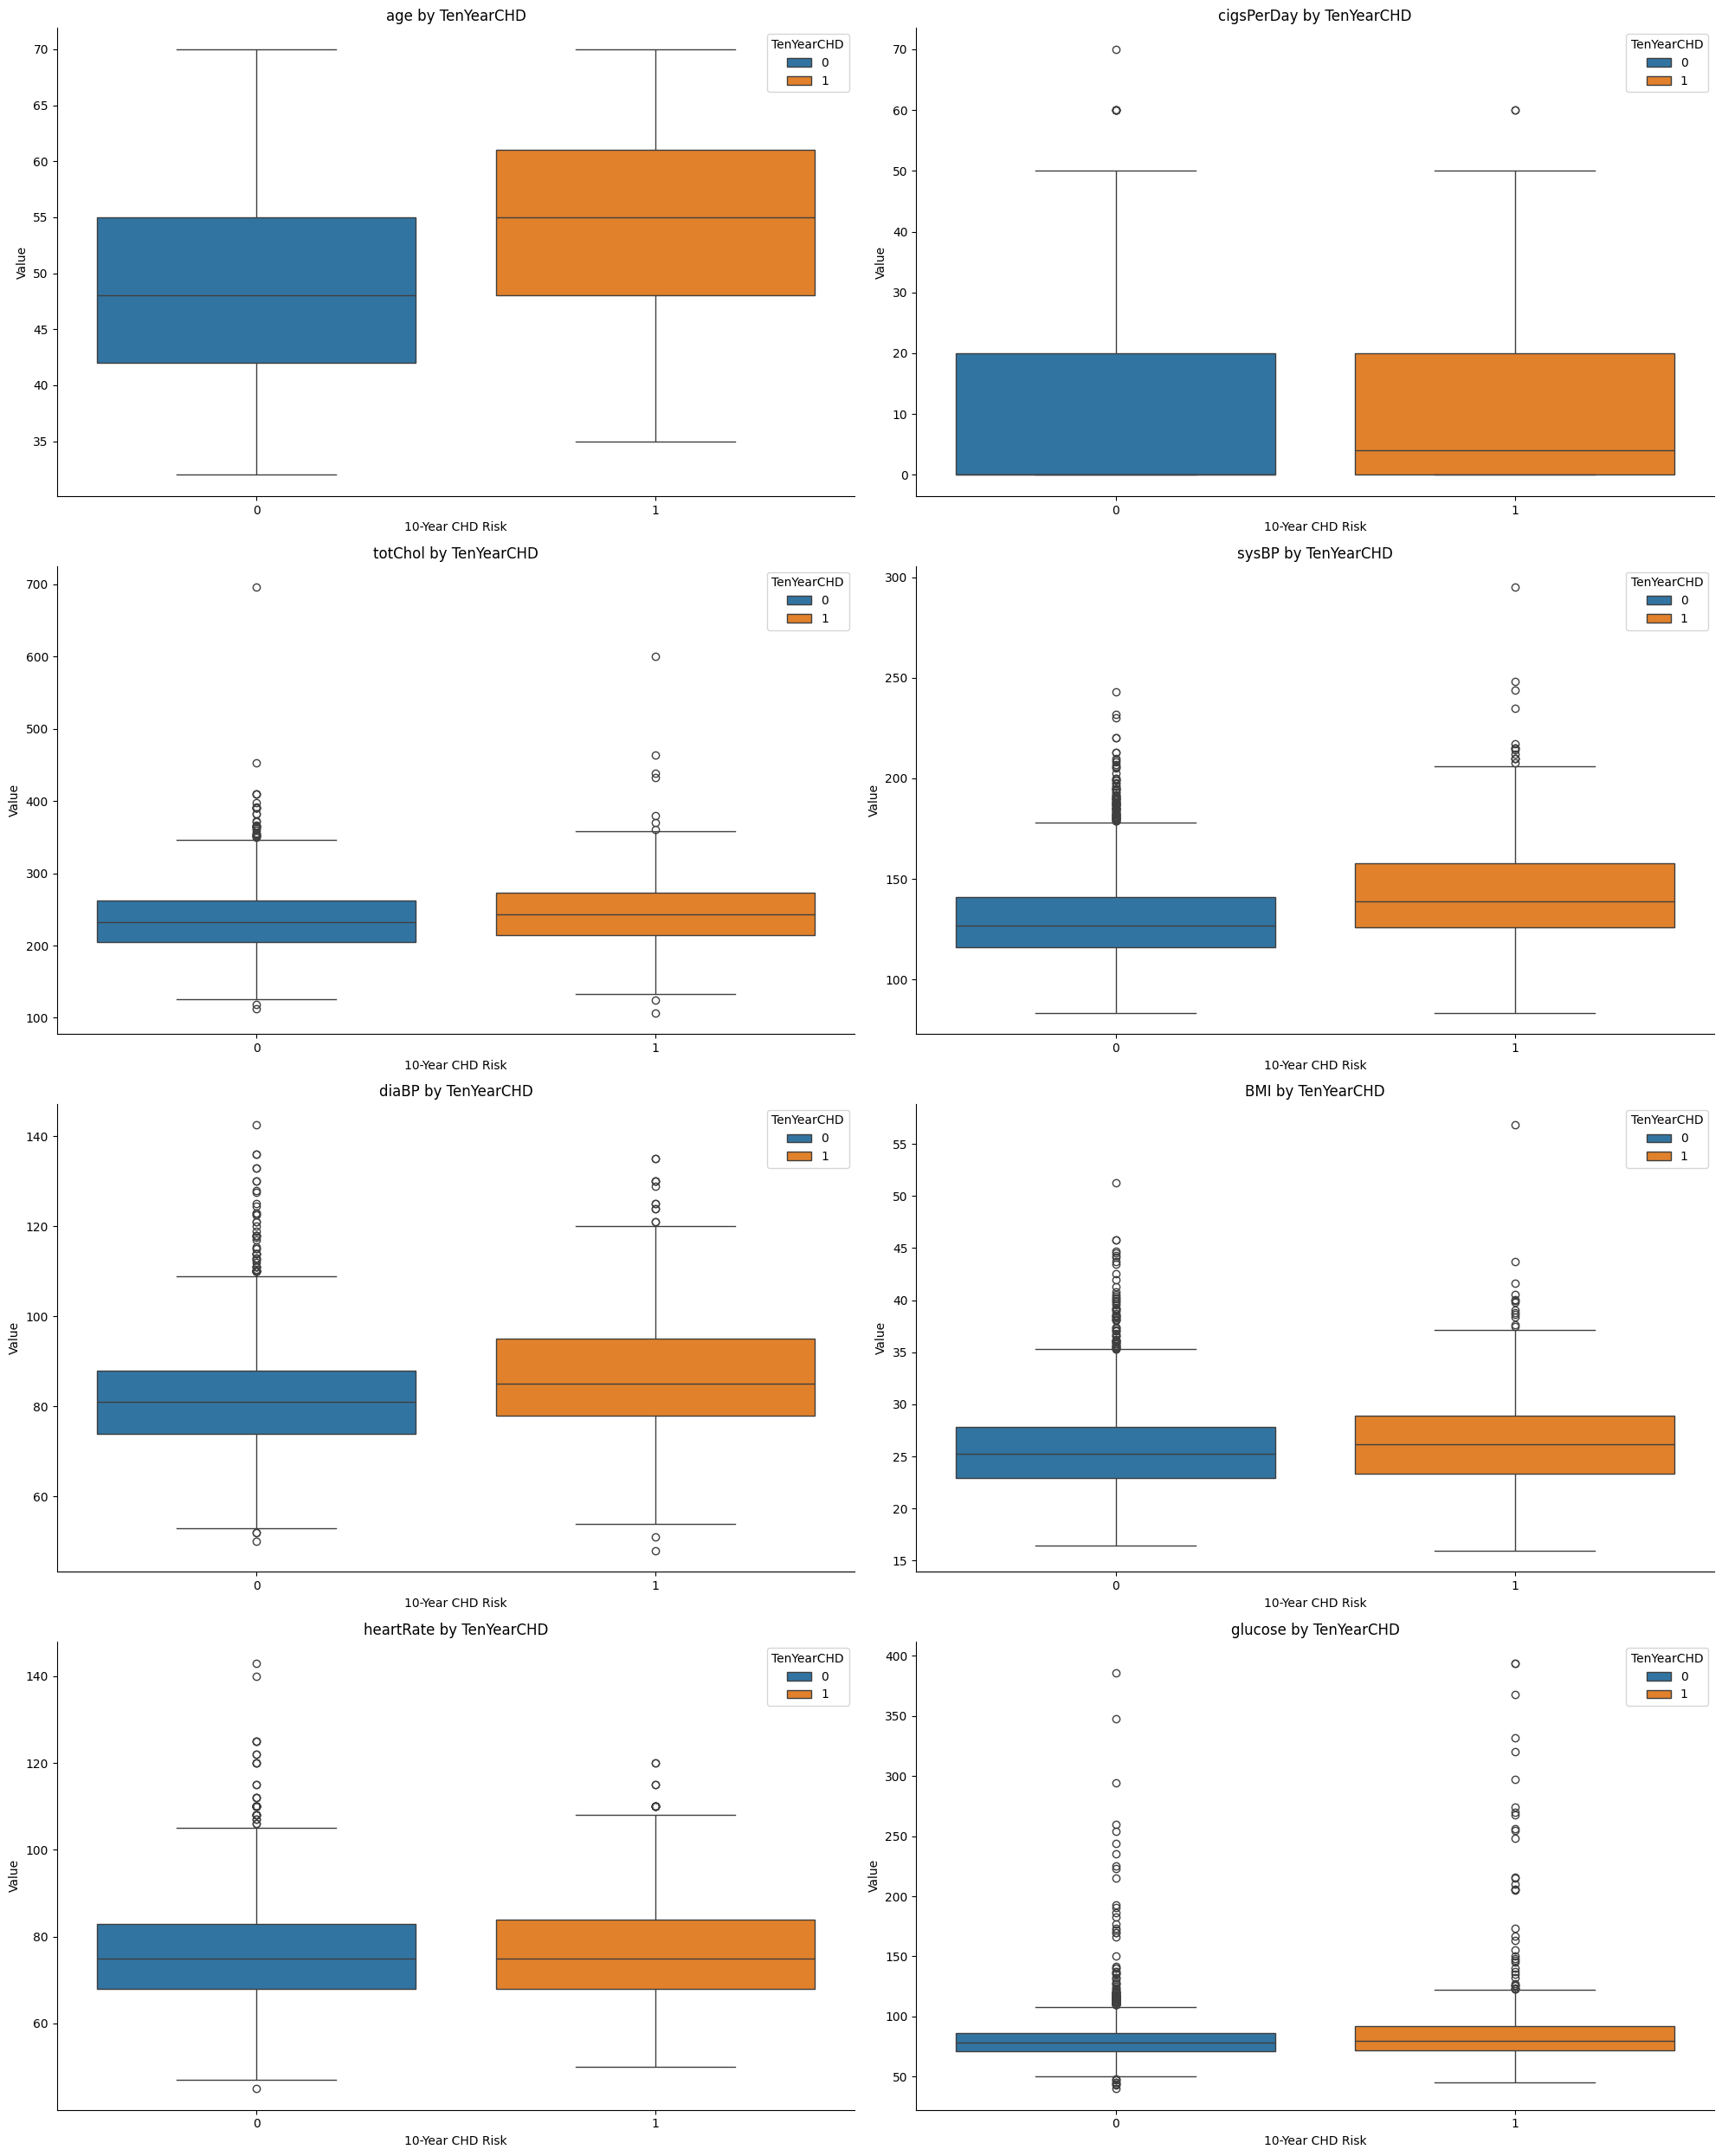

In [37]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 25))
axes = axes.flatten()

for i, var in enumerate(continuous_cols):
    sns.boxplot(data=df, x=target, y=var, hue="TenYearCHD", ax=axes[i])
    axes[i].spines["top"].set_visible(False)
    axes[i].spines["right"].set_visible(False)
    axes[i].set_title(f"{var} by TenYearCHD")
    axes[i].set_xlabel("10-Year CHD Risk")
    axes[i].set_ylabel("Value")

plt.tight_layout()
plt.show()

**Systolic Blood Pressure (sysBP)**: The box plot shows that patients with CHD have higher systolic blood pressure. There are numerous outliers in both groups. Systolic blood pressure looks like an important predictor. Handling outliers and possibly transforming this variable will be important.<br><br>
**Diastolic Blood Pressure (diaBP)**: Patients with CHD have higher diastolic blood pressure. There are several outliers in both groups. Diastolic blood pressure is an important predictor. Addressing outliers and normalising this variable may improve model performance.<br><br>
**Body Mass Index (BMI)**: The box plot shows that patients with CHD tend to have higher BMI. There are several outliers in both groups. BMI seems to be a significant predictor.

#### Outlier Detection
An external function, identify_outliers, is used to detect outliers in each continuous variable.

In [38]:
from outliers_function import handle_outliers

outliers_dict = {}

for col in continuous_cols:
    df_col = pd.DataFrame(df[col])

    # Detecting outliers for the current column
    outliers = handle_outliers(df_col, multiplier=1.5, remove=False)

    # Storing the outliers in the dictionary
    outliers_dict[col] = outliers[col].dropna()

    print(f"Number of outliers in {col}: {len(outliers_dict[col])}")

Number of outliers in age: 0
Number of outliers in cigsPerDay: 9
Number of outliers in totChol: 43
Number of outliers in sysBP: 105
Number of outliers in diaBP: 58
Number of outliers in BMI: 77
Number of outliers in heartRate: 64
Number of outliers in glucose: 158


In [39]:
for col in continuous_cols:
    outliers = handle_outliers(df[[col]])
    extreme_outliers = outliers[col].dropna()

    if not extreme_outliers.empty:
        # Getting the highest outlier value
        highest_outlier = extreme_outliers.max()

        print(f"Highest outlier in {col}: {highest_outlier}")

Highest outlier in cigsPerDay: 70.0
Highest outlier in totChol: 696.0
Highest outlier in sysBP: 295.0
Highest outlier in diaBP: 142.5
Highest outlier in BMI: 56.8
Highest outlier in heartRate: 143.0
Highest outlier in glucose: 394.0


Outliers can skew the model's understanding of the data. Decisions need to be made on whether to remove, cap, or transform these outliers.

#### Categorical Variables Distribution
Count plots are created for each categorical variable, grouped by the target variable TenYearCHD. This helps in understanding the distribution of each categorical variable and its relationship with the target variable.

Female (0) to Male (1) ratio:
sex
0    56.73
1    43.27
Name: proportion, dtype: float64


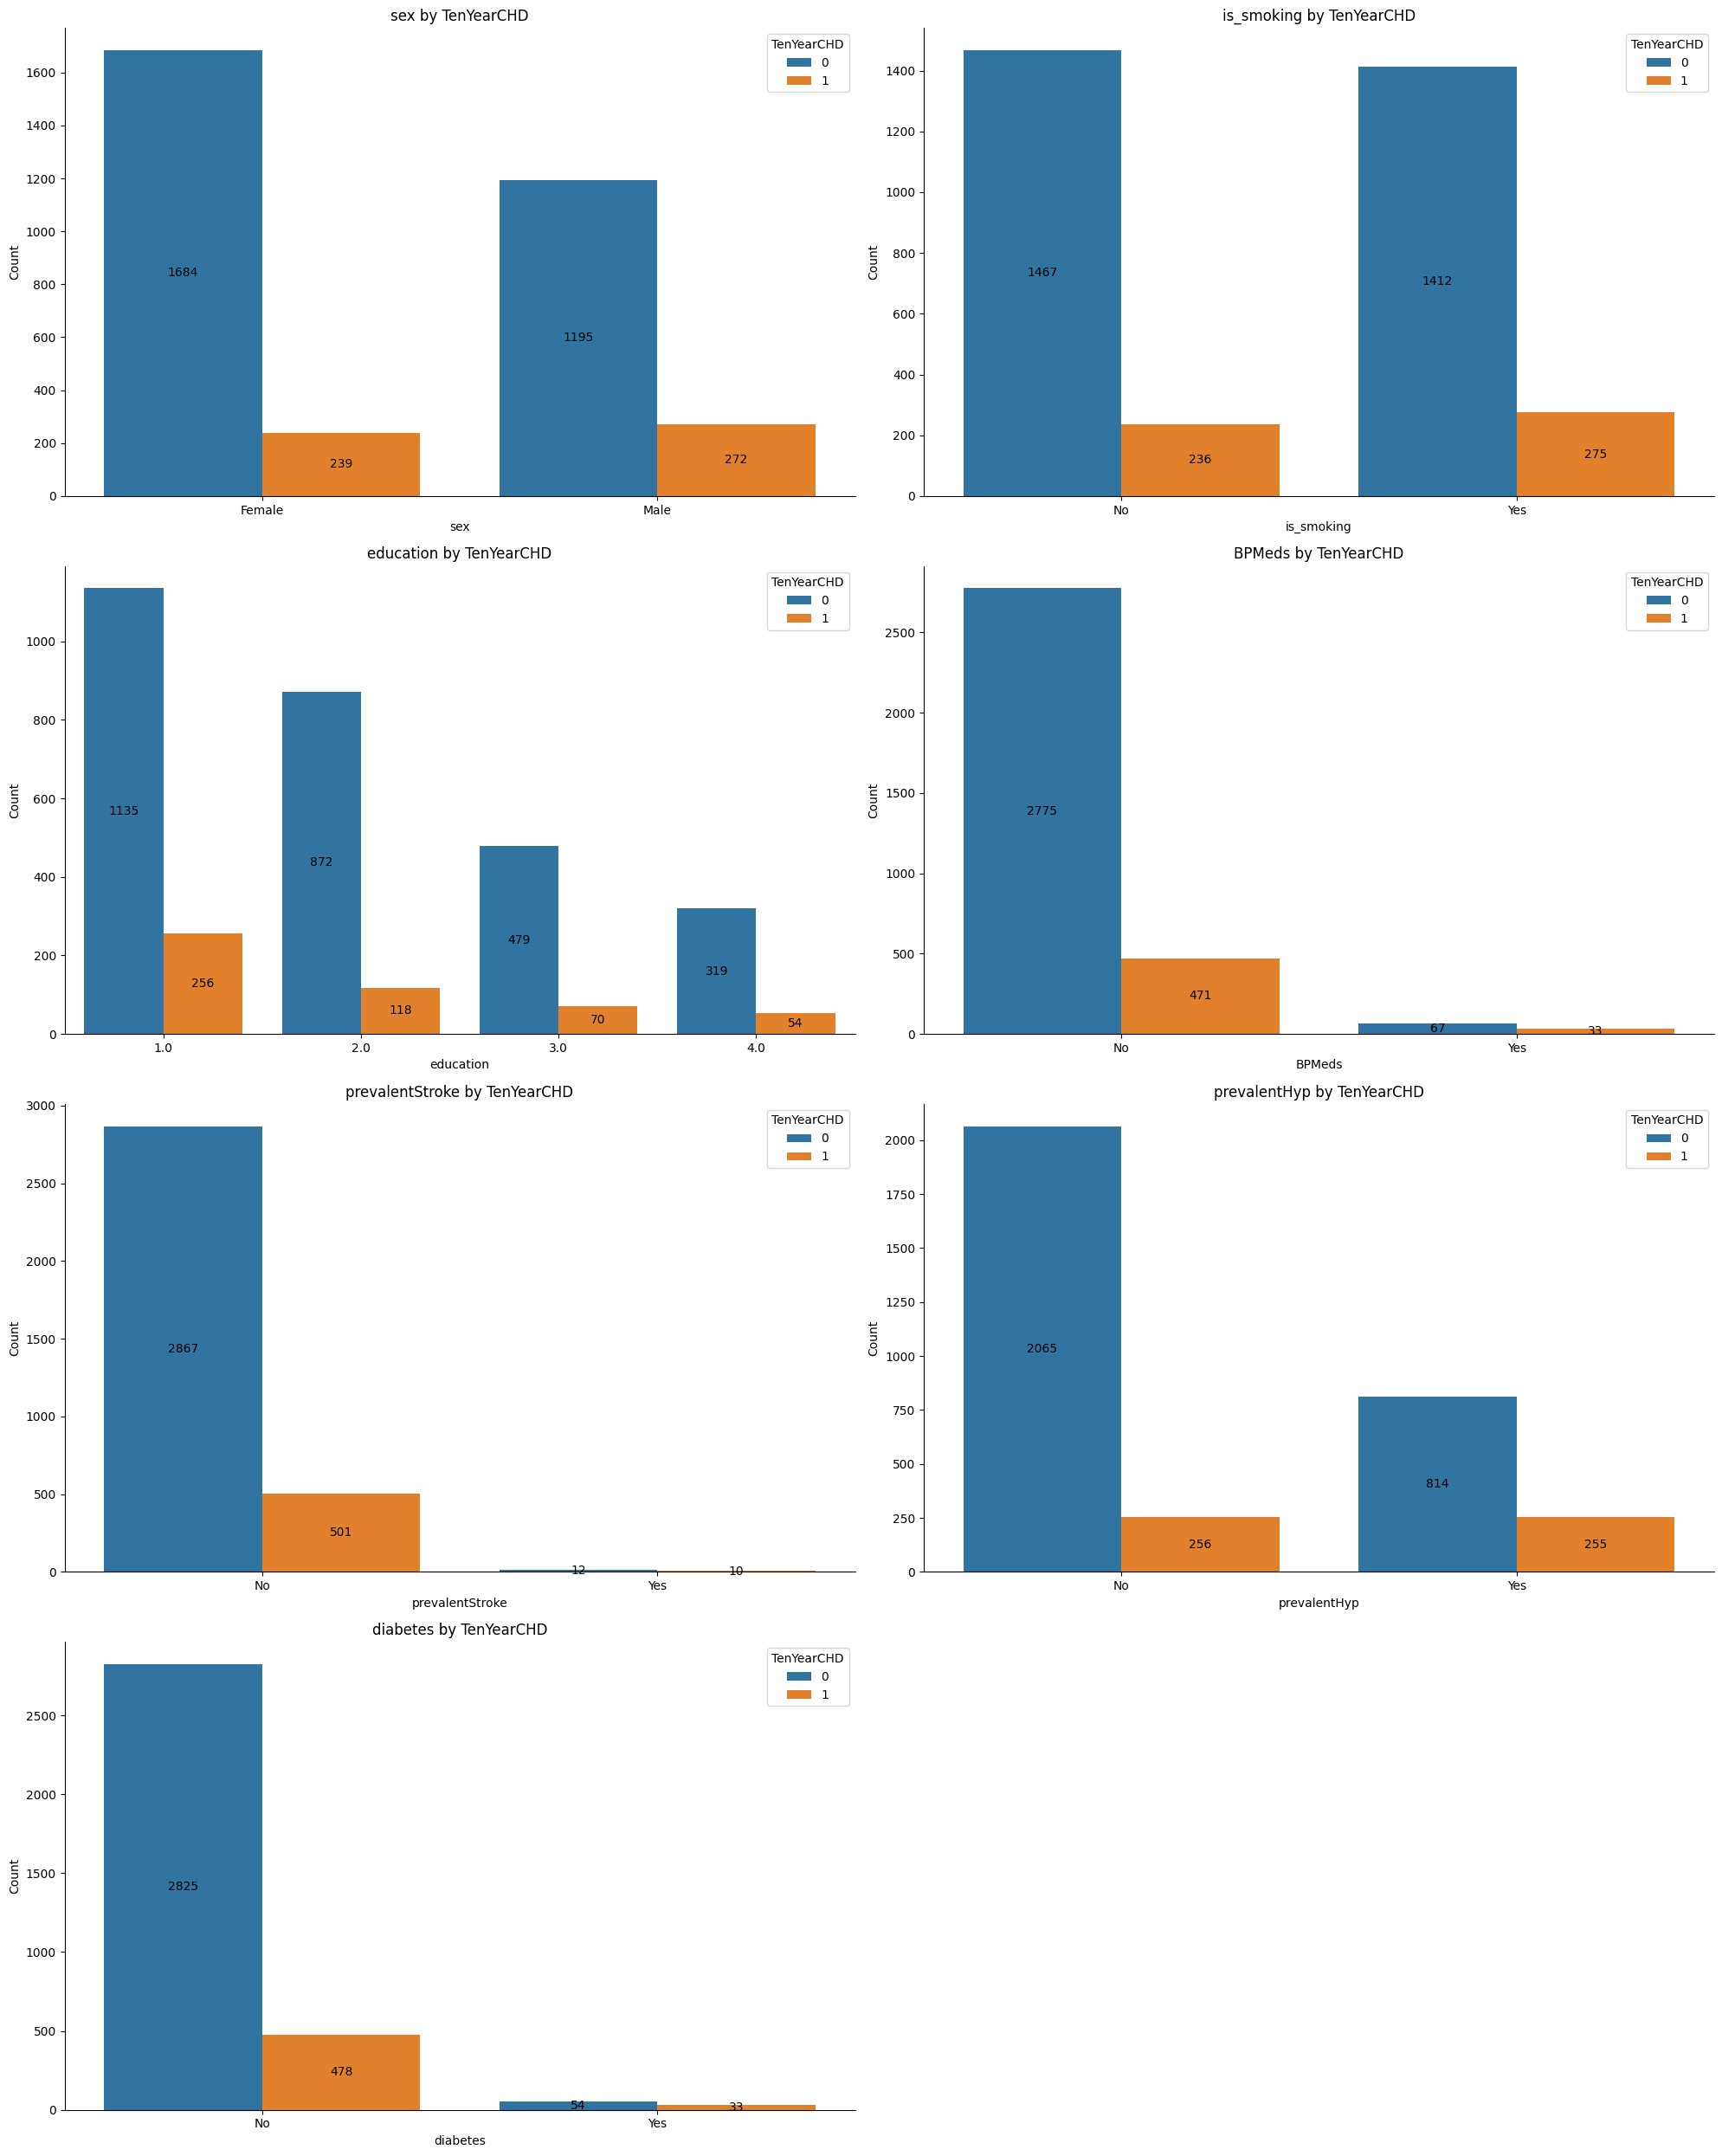

In [40]:
categorical_cols = [
    "sex",
    "is_smoking",
    "education",
    "BPMeds",
    "prevalentStroke",
    "prevalentHyp",
    "diabetes",
]

print(
    f"Female (0) to Male (1) ratio:\n{(df['sex'].value_counts(normalize=True) * 100).round(2)}"
)

# Defining custom labels for specific columns
custom_labels = {
    "sex": {0: "Female", 1: "Male"},
    "is_smoking": {0: "No", 1: "Yes"},
    "BPMeds": {0: "No", 1: "Yes"},
    "prevalentStroke": {0: "No", 1: "Yes"},
    "prevalentHyp": {0: "No", 1: "Yes"},
    "diabetes": {0: "No", 1: "Yes"}
}

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 25))
axes = axes.flatten()

for i, var in enumerate(categorical_cols):
    sns.countplot(data=df, x=var, hue="TenYearCHD", ax=axes[i])
    axes[i].spines["top"].set_visible(False)
    axes[i].spines["right"].set_visible(False)
    axes[i].set_title(f"{var} by TenYearCHD")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Count")

    # Adding count labels in the center of each bar
    for container in axes[i].containers:
        axes[i].bar_label(container, label_type="center")

    if var == "sex":
        axes[i].set_xticks([0, 1])
        axes[i].set_xticklabels(["Female", "Male"])
    elif var != "education":
        axes[i].set_xticks([0, 1])
        axes[i].set_xticklabels(["No", "Yes"])


# Removing the last empty subplot if there is one
if len(categorical_cols) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

**Sex**: The dataset consists of 1923 females and 1467 males. Among those with CHD, there are more males (272 - 18,5% of males) than females (239 - 12,4%). Sex is a significant predictor of CHD risk, with males showing a higher incidence of CHD. Proper encoding and consideration of this variable in the model are important.<br><br>
**Is Smoking**: The dataset has a nearly equal distribution of smokers (1) and non-smokers (0). Among those with CHD, there are more smokers (275) compared to non-smokers (236).<br><br>
**Education**: The education levels are distributed across four categories, with the majority having an education level of 1. Among those with CHD, the distribution is relatively consistent across education levels. Education level may have an indirect effect on CHD risk through socioeconomic factors.

In [41]:
chd_1 = df[df["TenYearCHD"] == 1]
chd_counts = chd_1.groupby("sex")["TenYearCHD"].sum()
sex_counts = df.groupby("sex")["sex"].count()
chd_ratio = chd_counts / sex_counts
print(f"Percentage of CHD cases per gender: {chd_ratio.round(3) * 100}")

Percentage of CHD cases per gender: sex
0    12.4
1    18.5
dtype: float64


#### Correlation Matrix
A heatmap of the correlation matrix is plotted to visualize the relationships between all pairs of variables. This helps identify multicollinearity and understand the strength of relationships between variables.

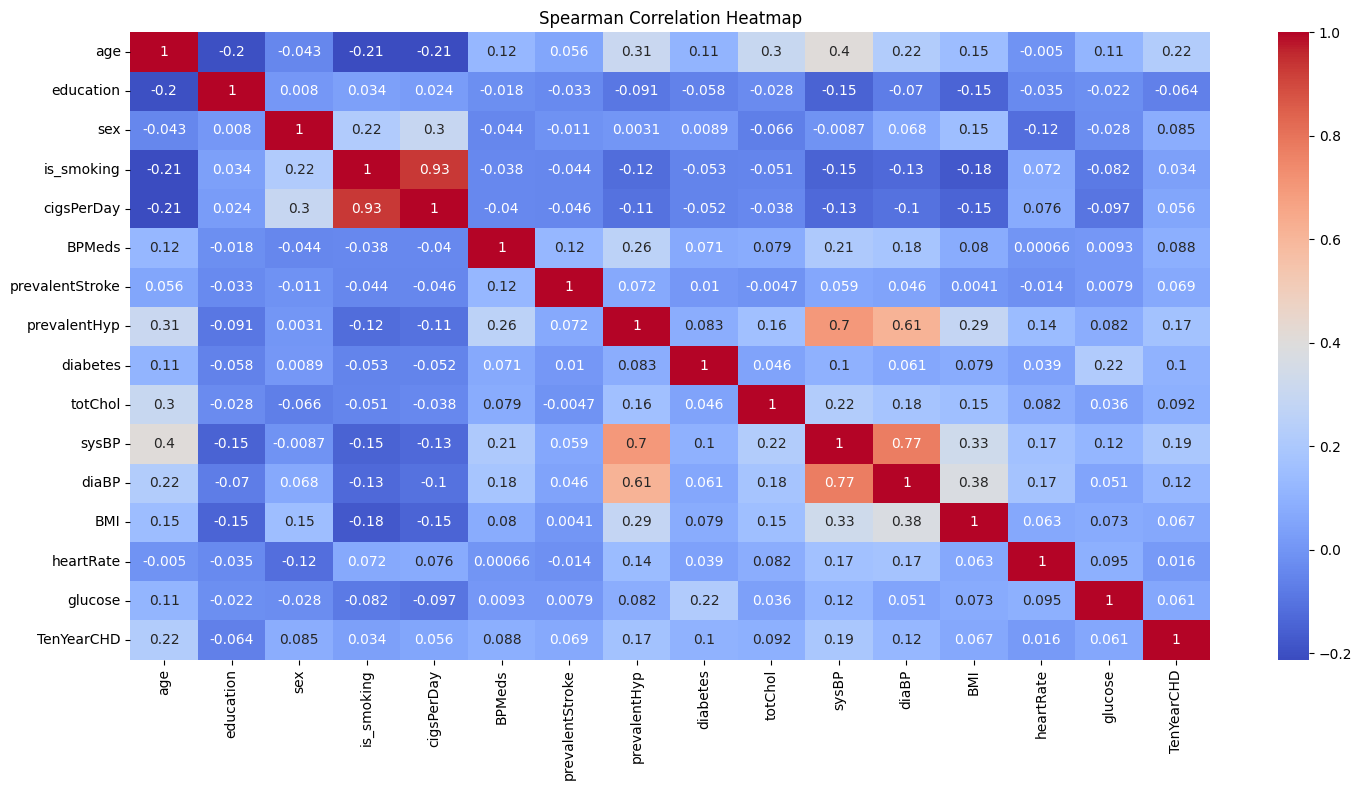

In [42]:
plt.figure(figsize=(15, 8))
correlation = df.corr(method="spearman")
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Spearman Correlation Heatmap")
plt.tight_layout()
plt.show()

**Age** has a weak positive correlation with **sysBP** (0.40), indicating that systolic blood pressure tends to increase with age.<br><br>
**Is_smoking** has a very high positive correlation with **cigsPerDay** (0.93), which is expected as smoking status is directly related to the number of cigarettes smoked per day.<br><br>
**PrevalentHyp** has moderate positive correlations with both **sysBP** (0.70) and **diaBP** (0.61), suggesting a significant link between hypertension and elevated blood pressure levels.<br><br>
**SysBP** and **diaBP** have a fairly strong positive correlation (0.77), which is expected as these two measures are components of overall blood pressure. The high correlation indicates that either measure could potentially be used in the model, or a composite measure could be created.<br><br>

Source: [Interpreting Correlation Coefficients](https://statisticsbyjim.com/basics/correlations/)

In [43]:
df.corr(method="spearman").round(3)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
age,1.000,-0.199,-0.043,-0.208,-0.212,0.120,0.056,0.307,0.107,0.303,0.404,0.220,0.147,-0.005,0.111,0.221
education,-0.199,1.000,0.008,0.034,0.024,-0.018,-0.033,-0.091,-0.058,-0.028,-0.147,-0.070,-0.146,-0.035,-0.022,-0.064
sex,-0.043,0.008,1.000,0.215,0.299,-0.044,-0.011,0.003,0.009,-0.066,-0.009,0.068,0.150,-0.117,-0.028,0.085
is_smoking,-0.208,0.034,0.215,1.000,0.931,-0.038,-0.044,-0.119,-0.053,-0.051,-0.148,-0.131,-0.178,0.072,-0.082,0.034
cigsPerDay,-0.212,0.024,0.299,0.931,1.000,-0.040,-0.046,-0.107,-0.052,-0.038,-0.129,-0.104,-0.145,0.076,-0.097,0.056
BPMeds,0.120,-0.018,-0.044,-0.038,-0.040,1.000,0.119,0.260,0.071,0.079,0.209,0.185,0.080,0.001,0.009,0.088
prevalentStroke,0.056,-0.033,-0.011,-0.044,-0.046,0.119,1.000,0.072,0.010,-0.005,0.059,0.046,0.004,-0.014,0.008,0.069
prevalentHyp,0.307,-0.091,0.003,-0.119,-0.107,0.260,0.072,1.000,0.083,0.159,0.699,0.612,0.287,0.138,0.082,0.167
diabetes,0.107,-0.058,0.009,-0.053,-0.052,0.071,0.010,0.083,1.000,0.046,0.100,0.061,0.079,0.039,0.218,0.104
totChol,0.303,-0.028,-0.066,-0.051,-0.038,0.079,-0.005,0.159,0.046,1.000,0.220,0.180,0.153,0.082,0.036,0.092


#### Summary for Future Modeling Steps
- **Class Imbalance**: Addressing class imbalance through techniques like class weighting, oversampling, or undersampling will be important to improve model performance on the minority class.
- **Feature Transformation**: Features with high variance or skewness may require transformation to enhance model performance.
- **Outlier Treatment**: Decisions on handling outliers (removal, capping, or transformation) will be crucial to prevent skewed model training.
- **Encoding Categorical Variables**: Proper encoding of categorical variables ensures they are appropriately utilized in the model.
- **Multicollinearity**: Addressing multicollinearity through feature selection or dimensionality reduction will help in building a stable model. Highly correlated features may need to be combined or one of them removed to prevent multicollinearity issues.

## Modeling

#### Importing Libraries and Splitting Data
Various libraries from sklearn are imported for data preprocessing, model building, evaluation, and feature selection.<br>
The dataset is split into training and testing sets using an 80-20 split, with stratification to maintain the class distribution. This ensures that the class imbalance is preserved in both training and testing sets.

In [44]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    StandardScaler,
    OrdinalEncoder,
    OneHotEncoder,
    FunctionTransformer,
)
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    StratifiedKFold,
)
from sklearn.metrics import (
    roc_auc_score,
    roc_curve,
    auc,
    classification_report,
    confusion_matrix,
    precision_recall_curve,
)
from sklearn.feature_selection import RFE
from scipy.stats import uniform, loguniform
from sklearn.inspection import permutation_importance

# Spliting the data
X = df.drop("TenYearCHD", axis=1)
y = df["TenYearCHD"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#### Preprocessing Pipeline
Continuous, categorical, and ordinal columns are defined. A custom function is created to remove extreme outliers.<br>
A ColumnTransformer is used to apply different preprocessing steps to different types of columns. Continuous variables are processed with extreme outliers removal, imputation, and scaling. Categorical variables are imputed and one-hot encoded. The ordinal variable is imputed and scaled.


In [46]:
# Defining feature groups
continuous_cols = [
    "age",
    "cigsPerDay",
    "totChol",
    "sysBP",
    "diaBP",
    "BMI",
    "heartRate",
    "glucose",
]
categorical_cols = [
    "sex",
    "is_smoking",
    "BPMeds",
    "prevalentStroke",
    "prevalentHyp",
    "diabetes",
]
ordinal = ["education"]


# Creating the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        (
            "num",
            Pipeline(
                [
                    ("outlier_remover", FunctionTransformer(lambda x: handle_outliers(x, multiplier=3, remove=True))),
                    ("imputer", KNNImputer(n_neighbors=5)),
                    ("scaler", StandardScaler()),
                ]
            ),
            continuous_cols,
        ),
        (
            "cat",
            Pipeline(
                [
                    ("imputer", SimpleImputer(strategy="most_frequent")),
                    ("onehot", OneHotEncoder(drop="first", sparse_output=False)),
                ]
            ),
            categorical_cols,
        ),
        (
            "education",
            Pipeline(
                [
                    ("imputer", SimpleImputer(strategy="most_frequent")),
                    ("encoder", OrdinalEncoder()),
                    ("scaler", StandardScaler()),
                ]
            ),
            ordinal,
        ),
    ]
)

Proper preprocessing ensures that the data is clean and standardised, which is crucial for building a robust model.

#### Model Pipeline and Training
A Pipeline is created that includes the preprocessing steps and a logistic regression classifier.<br>
The pipeline is fitted to the training data.

In [47]:
# Creating the full pipeline
pipeline = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression(random_state=42, class_weight="balanced")),
    ]
)

# Fitting the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('outlier_remover',
                                                                   FunctionTransformer(func=<function <lambda> at 0x15de08860>)),
                                                                  ('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'cigsPerDay',
                                                   'totChol', 'sysBP', 'diaBP',
                                                   'BMI', 'heartRate',
                                                   'glucose']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strate...
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['sex', 'is_smoking',
                                                   'BPMeds', 'prevalentStroke',
                                                   'prevalentHyp',
                                                   'diabetes']),
                                                 ('education',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['education'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', random_state=42))])

Using a pipeline ensures that all preprocessing steps are applied consistently during both training and prediction, leading to more reliable model performance.

#### Cross-Validation and Feature 
The pipeline is evaluated using 5-fold cross-validation, and the ROC AUC scores are printed.<br>
Recursive Feature Elimination (RFE) is used to select the top 10 features. The pipeline is re-fitted with the selected features, and cross-validation is performed again.

In [48]:
# Setting up stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Try 

# Evaluating the pipeline with all features using cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring="roc_auc")
print(f"\nCross-validation ROC AUC scores for pipeline with all features: {cv_scores}")
print(f"Mean ROC AUC: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")


# Implementing feature selection using Recursive Feature Elimination (RFE)
pipeline_select = Pipeline(
    [
        ("preprocessor", preprocessor),
        (
            "rfe",
            RFE(
                estimator=LogisticRegression(random_state=42),
                n_features_to_select=10,
                step=1,
            ),
        ),
        ("classifier", LogisticRegression(random_state=42, class_weight="balanced")),
    ]
)

# Fitting the pipeline with selected features
pipeline_select.fit(X_train, y_train)

# Evaluating the pipeline with selected features using cross-validation
cv_scores_select = cross_val_score(
    pipeline_select, X_train, y_train, cv=cv, scoring="roc_auc"
)
print(
    f"\nCross-validation ROC AUC scores for pipeline with RFE feature selection: {cv_scores_select}"
)
print(
    f"Mean ROC AUC: {cv_scores_select.mean():.3f} (+/- {cv_scores_select.std() * 2:.3f})"
)

# Retrieving all features used in the standard pipeline
standard_features = X_train.columns
print(f"\nFeatures used in standard pipeline:\n{standard_features.tolist()}")

# Extracting selected features after RFE
selected_features = X_train.columns[pipeline_select.named_steps["rfe"].support_]
print(f"\n{selected_features.tolist()}")


Cross-validation ROC AUC scores for pipeline with all features: [1.         0.69791667 0.88541667 0.8173913  0.8        0.66956522
 0.77391304 0.66956522 0.5826087  0.49565217 0.83478261 0.67826087
 0.70652174 0.7826087  0.88043478 0.66304348 0.68478261 0.90217391
 0.73913043 0.69565217 0.86956522 0.75       0.69565217 0.65217391
 0.92391304 0.72826087 0.35869565 0.77173913 0.79347826 0.68478261
 0.69565217 0.55434783 0.7826087  0.47826087 0.81521739 0.41304348
 0.57608696 0.43478261 0.7173913  0.43478261 0.69565217 0.84782609
 0.93478261 0.84782609 0.82608696 0.47826087 0.66304348 0.94565217
 0.61956522 0.61956522 0.72826087 0.61956522 0.48913043 0.60869565
 0.85869565 0.93478261 0.69565217 0.91304348 0.63043478 0.68478261
 0.73913043 0.63043478 0.83695652 0.41304348 0.90217391 0.75
 0.88043478 0.84782609 0.84782609 0.51086957 0.77173913 0.7826087
 0.89130435 0.68478261 0.80434783 0.54347826 0.66304348 0.86956522
 0.80434783 0.79347826 0.67391304 0.92391304 0.75       0.86956522
 0.4

Feature selection helps in reducing model complexity and improving performance by focusing on the most important features.

#### Feature Importance
The importance of the selected features is analysed by examining the absolute values of the logistic regression coefficients. A bar plot is created to visualise the feature's importance.

<Figure size 1000x600 with 0 Axes>

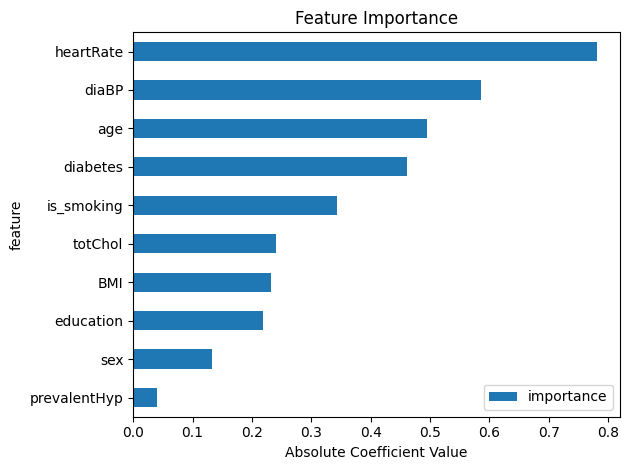


Feature Importance:
        feature  importance
9     heartRate       0.781
7         diaBP       0.586
0           age       0.495
5      diabetes       0.461
3    is_smoking       0.344
6       totChol       0.241
8           BMI       0.232
1     education       0.218
2           sex       0.133
4  prevalentHyp       0.040


In [49]:
# Extracting the trained classifier from the pipeline
model = pipeline_select.named_steps["classifier"]

# Creating DataFrame with feature importance
df_importance = pd.DataFrame(
    {
        "feature": selected_features,
        "importance": abs(model.coef_[0]),  # Using absolute values for importance
    }
)

# Visualizing feature importance
plt.figure(figsize=(10, 6))
df_importance.sort_values(by="importance", ascending=True).plot(
    kind="barh", x="feature", y="importance"
)
plt.title("Feature Importance")
plt.xlabel("Absolute Coefficient Value")
plt.tight_layout()
plt.show()

# Printing feature importance rankings
print("\nFeature Importance:")
print(df_importance.sort_values(by="importance", ascending=False).round(3))

Understanding feature importance helps in interpreting the model and identifying which features contribute most to the predictions.

#### Model Evaluation
A function evaluate_model is defined to fit the model, make predictions, and calculate evaluation metrics. It also finds the optimal threshold using Youden's J statistic.<br>
The optimal threshold is calculated to improve the model's performance.

In [50]:
def evaluate_model(pipeline_select, X_train, y_train, X_test, y_test):
    # Fitting the model to the training data
    pipeline_select.fit(X_train, y_train)

    # Making predictions and calculating probabilities for both training and test sets
    y_pred_train = pipeline_select.predict(X_train)
    y_pred_train_proba = pipeline_select.predict_proba(X_train)[:, 1]
    y_pred = pipeline_select.predict(X_test)
    y_pred_proba = pipeline_select.predict_proba(X_test)[:, 1]

    # Printing classification reports for training and test sets
    print("\nClassification Report (Training Set):")
    print(classification_report(y_train, y_pred_train))

    print("\nClassification Report (Test Set):")
    print(classification_report(y_test, y_pred))

    # Calculating and printing ROC AUC scores
    roc_auc_train = roc_auc_score(y_train, y_pred_train_proba)
    roc_auc_test = roc_auc_score(y_test, y_pred_proba)
    print(f"ROC AUC Score (Training Set): {roc_auc_train:.3f}")
    print(f"ROC AUC Score (Test Set): {roc_auc_test:.3f}")

    # Finding the optimal threshold and applying it to predictions
    optimal_threshold = find_optimal_threshold(y_test, y_pred_proba)
    y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

    # Printing classification report with optimal threshold
    print("\nClassification Report (Test Set) with Optimal Threshold:")
    print(classification_report(y_test, y_pred_optimal))

    return (
        roc_auc_train,
        roc_auc_test,
        optimal_threshold,
        selected_features,
        y_pred_proba,
        y_pred_optimal,
    )


def find_optimal_threshold(y_true, y_pred_proba):
    # Calculating ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)

    # Finding optimal threshold using Youden's J statistic
    j_scores = tpr - fpr
    optimal_idx = np.argmax(j_scores)
    optimal_threshold = thresholds[optimal_idx]

    print(f"\nOptimal Threshold: {optimal_threshold:.3f}")
    return optimal_threshold


# Evaluating the model with selected features
(
    roc_auc_train,
    roc_auc_test,
    optimal_threshold,
    selected_features,
    y_pred_proba,
    y_pred_optimal,
) = evaluate_model(pipeline_select, X_train, y_train, X_test, y_test)

# Printing final evaluation results
print(f"\nEvaluation completed.")
print(f"ROC AUC (Training Set): {roc_auc_train:.3f}")
print(f"ROC AUC (Test Set): {roc_auc_test:.3f}")
print(f"Optimal Threshold: {optimal_threshold:.3f}")
print(f"Selected Features: {selected_features.tolist()}")


Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.92      0.67      0.78      2303
           1       0.27      0.67      0.38       409

    accuracy                           0.67      2712
   macro avg       0.59      0.67      0.58      2712
weighted avg       0.82      0.67      0.72      2712


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.92      0.72      0.80       576
           1       0.28      0.63      0.39       102

    accuracy                           0.70       678
   macro avg       0.60      0.67      0.60       678
weighted avg       0.82      0.70      0.74       678

ROC AUC Score (Training Set): 0.734
ROC AUC Score (Test Set): 0.721

Optimal Threshold: 0.462

Classification Report (Test Set) with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.93      0.66      0.78       576
           

**Classification Report (Training Set)**:<br>
Class 0 (No CHD): High precision (0.92) but lower recall (0.67), indicating that while the model is good at identifying true negatives, it misses a significant number of true positives.<br>
Class 1 (CHD): Low precision (0.27) but moderate recall (0.67), indicating that the model identifies a fair number of true positives but also has a high false positive rate.<br>
Overall Accuracy: 0.67, indicating that the model correctly classifies 67% of the training data.<br>
Modeling Insight: The model shows a significant imbalance in performance between the two classes, with better performance for the majority class (No CHD).<br>


**Classification Report (Test Set)**:<br>
Class 0 (No CHD): High precision (0.92) and moderate recall (0.72), indicating that the model is good at identifying true negatives but still misses some true positives.<br>
Class 1 (CHD): Low precision (0.28) but moderate recall (0.63), indicating that the model identifies a fair number of true positives but also has a high false positive rate.<br>
Overall Accuracy: 0.70, indicating that the model correctly classifies 70% of the test data.<br>
Modeling Insight: The model's performance on the test set is consistent with the training set, showing a similar imbalance in performance between the two classes.<br>

ROC AUC Score (Training Set): 0.734, indicating a good ability to distinguish between the two classes.<br>
ROC AUC Score (Test Set): 0.721, indicating a slightly lower but still good ability to distinguish between the two classes.<br>
The ROC AUC scores indicate that the model has a good overall performance in distinguishing between CHD and No CHD, but there is room for improvement, especially in handling the minority class.<br>

**Classification Report (Test Set) with Optimal Threshold**:<br>
Class 0 (No CHD): Slightly higher precision (0.93) but lower recall (0.66) compared to the default threshold.<br>
Class 1 (CHD): Similar precision (0.28) but higher recall (0.73) compared to the default threshold.<br>
Overall Accuracy: 0.67, indicating that the model correctly classifies 67% of the test data with the optimal threshold.<br>
Modeling Insight: The optimal threshold improves recall for the minority class (CHD) at the expense of precision, leading to a better balance between precision and recall.

#### Confusion Matrix and ROC Curve
A confusion matrix is created to visualise the performance of the model with the optimal threshold.<br>
The ROC curve is plotted to visualize the trade-off between the true positive rate and false positive rate. The area under the curve (AUC) is also calculated.


Classification Report (with Optimal Threshold):
              precision    recall  f1-score   support

           0       0.93      0.66      0.78       576
           1       0.28      0.73      0.40       102

    accuracy                           0.67       678
   macro avg       0.60      0.70      0.59       678
weighted avg       0.83      0.67      0.72       678



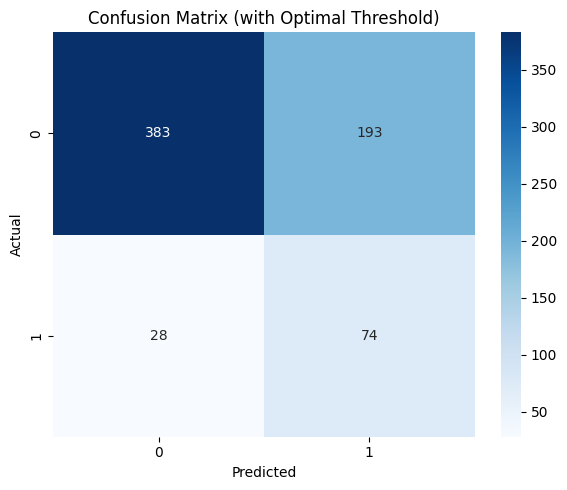

In [51]:
# Printing classification report with optimal threshold
print("\nClassification Report (with Optimal Threshold):")
print(classification_report(y_test, y_pred_optimal))

# Generating confusion matrix
cm = confusion_matrix(y_test, y_pred_optimal)

# Creating a heatmap visualization of the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (with Optimal Threshold)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()

**True Positives (TP)**: 74 - These are the cases where the model correctly predicted CHD (1).<br>
**True Negatives (TN)**: 383 - These are the cases where the model correctly predicted no CHD (0).<br>
**False Positives (FP)**: 193 - These are the cases where the model incorrectly predicted CHD (1) when it was actually no CHD (0).<br>
**False Negatives (FN)**: 28 - These are the cases where the model incorrectly predicted no CHD (0) when it was actually CHD (1).<br>

#### Calculations for Classification Metrics

**Class 0 (No CHD)**:
-  Precision: TN / (TN + FN) = 383 / (383 + 28) ≈ 0.932
-   Recall: TN / (TN + FP) = 383 / (383 + 193) ≈ 0.665

**F1-score**: 
-  2 (Precision Recall) / (Precision + Recall) ≈ 0.776

**Class 1 (CHD)**:
-  Precision: TP / (TP + FP) = 74 / (74 + 193) ≈ 0.277
-  Recall: TP / (TP + FN) = 74 / (74 + 28) ≈ 0.725
-  F1-score: 2 (Precision Recall) / (Precision + Recall) ≈ 0.401

**Overall**:
-  Accuracy: (TN + TP) / Total = (383 + 74) / 678 ≈ 0.674

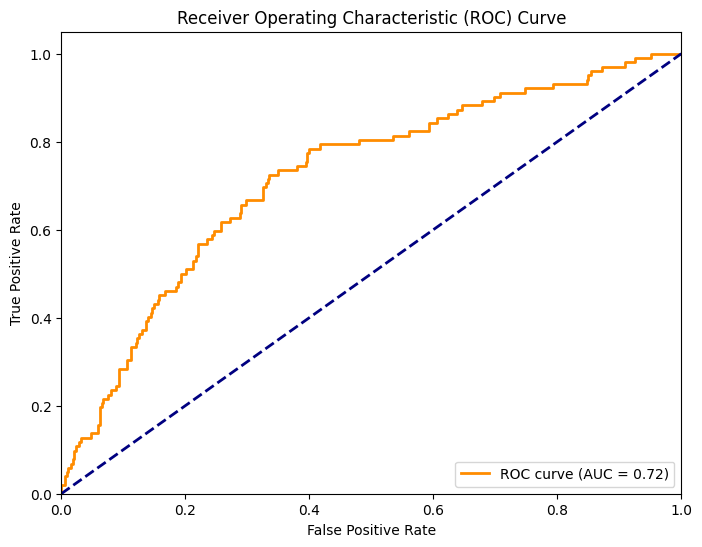

In [52]:
# Calculating ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

#### Precision-Recall Curve
The precision-recall curve is plotted to visualize the trade-off between precision and recall at different thresholds. The optimal threshold is marked on the plot.

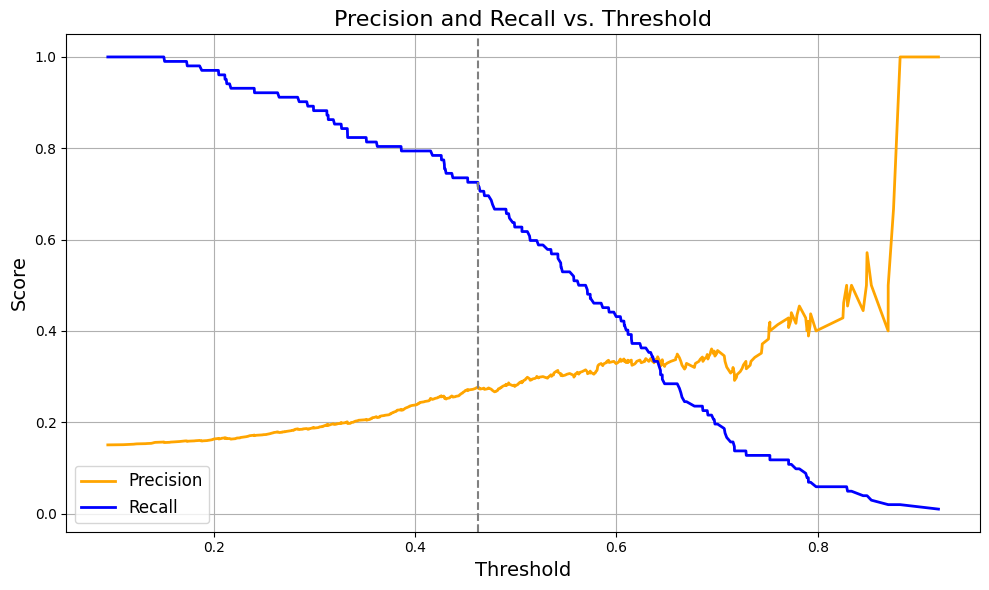

In [53]:
# Calculating precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plotting Precision-Recall vs. Threshold curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label="Precision", linewidth=2, color="orange")
plt.plot(thresholds, recall[:-1], label="Recall", linewidth=2, color="blue")
plt.xlabel("Threshold", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.title("Precision and Recall vs. Threshold", fontsize=16)
plt.legend(loc="best", fontsize=12)
plt.grid(True)
plt.axvline(x=optimal_threshold, color="gray", linestyle="--")
plt.tight_layout()
plt.show()

## Key Insights
- **Class Imbalance**: Addressing class imbalance through techniques like class weighting, oversampling, or undersampling is crucial to improve model performance on the minority class.
- **Feature Transformation**: Features with high variance or skewness may require transformation to enhance model performance.
- **Outlier Treatment**: Handling outliers (removal, capping, or transformation) is essential to prevent skewed model training.
- **Encoding Categorical Variables**: Proper encoding of categorical variables ensures they are appropriately utilised in the model.
- **Multicollinearity**: Addressing multicollinearity through feature selection or dimensionality reduction will help in building a stable model.
- **Evaluation Metrics**: Continuously monitoring and evaluating the model using various metrics (e.g., Precision-Recall, ROC AUC) will ensure that the model remains robust and reliable.

### Resources

1. [An Introduction to Statistical Learning with Applications in Python](https://www.statlearning.com/): I used this book to gain a solid foundation in statistical learning methods and their applications in Python. It covers essential topics such as regression, classification, and resampling methods, which are crucial for understanding and implementing logistic regression models. 
2. [Cardiovascular Study Dataset](https://www.kaggle.com/datasets/christofel04/cardiovascular-study-dataset-predict-heart-disea/data): This dataset was integral to my project as it provided real-world health indicators necessary for predicting heart disease. By using this dataset, I could train and test my logistic regression models.
3. [Cardiovascular Risk Prediction](https://www.kaggle.com/code/bansodesandeep/cardiovascular-risk-prediction): I referred to this Kaggle notebook to understand the practical steps involved in predicting cardiovascular risk. The notebook provided detailed instructions on data preprocessing, feature selection, and model evaluation, which were instrumental in guiding my approach to building and refining logistic regression models for my project.
4. [Framingham Heart Study](https://www.framinghamheartstudy.org/): The Framingham Heart Study offered comprehensive data and insights into cardiovascular disease risk factors over a long period. This resource was invaluable for understanding the long-term predictors of heart disease and incorporating these insights into my logistic regression models to improve their predictive accuracy.
5. [Educational Attainment and Coronary Heart Disease Risk: The Framingham Offspring Study](https://www.sciencedirect.com/science/article/abs/pii/S0091743583710042): This study provided an in-depth analysis of the relationship between educational attainment and coronary heart disease risk. By incorporating findings from this research, I could consider socio-economic factors in my logistic regression models, thereby enhancing the comprehensiveness and relevance of my analysis.
6. [Kaggle: Pipelines](https://www.kaggle.com/code/alexisbcook/pipelines): I used this tutorial to learn about constructing machine learning pipelines, which are essential for streamlining the workflow in my project. Pipelines allowed me to automate the preprocessing and modeling steps, making my logistic regression model development more efficient and reproducible.
7. [sklearn.pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): The documentation for sklearn.pipeline provided detailed information on how to implement pipelines in scikit-learn. This was crucial for chaining together multiple preprocessing and modeling steps in my logistic regression project, ensuring a seamless and organised workflow.
8. [Omni Calculator](https://www.omnicalculator.com/): I used Omni Calculator to check the normal ranges of key health metrics and understand what constitutes an outlier or anomaly. This helped me in the data preprocessing phase of my logistic regression project by identifying and managing unusual data points, ensuring the accuracy and reliability of my models.